### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

## libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Using pandas reading the audit_risk and trial.csv.

In [2]:
audit_risk_df = pd.read_csv("audit_risk.csv")
trial_df = pd.read_csv("trial.csv")
audit_risk_df.T

,0,1,2,3,4,5,6,7,8,9,...,766,767,768,769,770,771,772,773,774,775
Sector_score,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,...,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57
LOCATION_ID,23,6,6,6,6,6,7,8,8,8,...,8,18,9,16,18,9,16,14,18,15
PARA_A,4.18,0,0.51,0,0,0,1.1,8.5,8.4,3.98,...,0.8,0.36,0.44,0.51,0.75,0.49,0.47,0.24,0.2,0
Score_A,0.6,0.2,0.2,0.2,0.2,0.2,0.4,0.6,0.6,0.6,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Risk_A,2.508,0,0.102,0,0,0,0.44,5.1,5.04,2.388,...,0.16,0.072,0.088,0.102,0.15,0.098,0.094,0.048,0.04,0
PARA_B,2.5,4.83,0.23,10.8,0.08,0.83,7.41,12.03,11.05,0.99,...,0.57,0.54,0.53,0.5,0.45,0.4,0.37,0.04,0,0
Score_B,0.2,0.2,0.2,0.6,0.2,0.2,0.4,0.6,0.6,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Risk_B,0.5,0.966,0.046,6.48,0.016,0.166,2.964,7.218,6.63,0.198,...,0.114,0.108,0.106,0.1,0.09,0.08,0.074,0.008,0,0
TOTAL,6.68,4.83,0.74,10.8,0.08,0.83,8.51,20.53,19.45,4.97,...,1.37,0.9,0.97,1.01,1.2,0.89,0.84,0.28,0.2,0
numbers,5,5,5,6,5,5,5,5.5,5.5,5,...,5,5,5,5,5,5,5,5,5,5


In [3]:
audit_risk_df.rename(columns={'PROB': 'PROB1'}, inplace=True)

In [4]:
print(audit_risk_df.columns)
print(trial_df.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB1', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


# After reading the two datasets the following observations were made : 

## Detection_Risk is a constant value 

In [5]:
audit_risk_df = audit_risk_df.drop("Detection_Risk", axis = 1) #Dropping the Detection Risk column as it has a variance of zero.

In [6]:
trial_df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.5000,2,6.6800,5.0,2,3.380,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.8300,2,4.8300,5.0,2,0.940,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.2300,2,0.7400,5.0,2,0.000,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.8000,6,10.8000,6.0,6,11.750,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.0800,2,0.0800,5.0,2,0.000,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.8300,2,0.8300,5.0,2,2.950,2,2,0,2,0,2,2.0,0
6,3.89,7,1.10,4,7.4100,4,8.5100,5.0,2,44.950,6,2,0,2,0,2,3.2,1
7,3.89,8,8.50,6,12.0300,6,20.5300,5.5,4,7.790,4,2,0,2,0,2,4.2,1
8,3.89,8,8.40,6,11.0500,6,19.4500,5.5,4,7.340,4,2,0,2,0,2,4.2,1
9,3.89,8,3.98,6,0.9900,2,4.9700,5.0,2,1.930,2,2,0,2,0,2,2.4,1


In [7]:
audit_risk_df.head(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB1,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0


## SCORE_A and SCORE_B in trial_df are 10* Score_A and 10*Score_B of audit_risk_df

In [8]:
audit_risk_df["Score_A"] = audit_risk_df["Score_A"]*10
audit_risk_df["Score_B"] = audit_risk_df["Score_B"]*10

In [9]:

c_with_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score', 'Risk']
c_without_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score']
c_with_risk_cols_upper = [x.upper() for x in c_with_risk_cols]
c_without_risk_cols_upper = [x.upper() for x in c_without_risk_cols]

audit_names = audit_risk_df.columns
audit_names_upper =  [x.upper() for x in audit_names]
audit_risk_df.columns = audit_names_upper

trial_names = trial_df.columns
trial_names_upper =  [x.upper() for x in trial_names]
trial_df.columns = trial_names_upper

In [10]:
# c_with_risk_cols will result in an inner merge (~580 observations on dropping duplicates)
risk_df = audit_risk_df.merge(trial_df, on=c_without_risk_cols_upper)
risk_df.shape
risk_df = risk_df.drop_duplicates()
risk_df.shape

(763, 33)

In [11]:
risk_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'RISK_x', 'MARKS', 'MONEY_MARKS', 'DISTRICT', 'LOSS',
       'LOSS_SCORE', 'HISTORY_SCORE', 'RISK_y'],
      dtype='object')

### Checking for the null values in the final merged data

In [12]:
risk_df['MONEY_VALUE'] = risk_df["MONEY_VALUE"].fillna(risk_df["MONEY_VALUE"].mean())

risk_df.isnull().any()

SECTOR_SCORE     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
RISK_A           False
PARA_B           False
SCORE_B          False
RISK_B           False
TOTAL            False
NUMBERS          False
SCORE_B.1        False
RISK_C           False
MONEY_VALUE      False
SCORE_MV         False
RISK_D           False
DISTRICT_LOSS    False
PROB1            False
RISK_E           False
HISTORY          False
PROB             False
RISK_F           False
SCORE            False
INHERENT_RISK    False
CONTROL_RISK     False
AUDIT_RISK       False
RISK_x           False
MARKS            False
MONEY_MARKS      False
DISTRICT         False
LOSS             False
LOSS_SCORE       False
HISTORY_SCORE    False
RISK_y           False
dtype: bool

In [13]:
risk_df = risk_df.copy()

# Check type conversions
risk_df.dtypes

SECTOR_SCORE     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A          float64
RISK_A           float64
PARA_B           float64
SCORE_B          float64
RISK_B           float64
TOTAL            float64
NUMBERS          float64
SCORE_B.1        float64
RISK_C           float64
MONEY_VALUE      float64
SCORE_MV         float64
RISK_D           float64
DISTRICT_LOSS      int64
PROB1            float64
RISK_E           float64
HISTORY            int64
PROB             float64
RISK_F           float64
SCORE            float64
INHERENT_RISK    float64
CONTROL_RISK     float64
AUDIT_RISK       float64
RISK_x             int64
MARKS              int64
MONEY_MARKS        int64
DISTRICT           int64
LOSS               int64
LOSS_SCORE         int64
HISTORY_SCORE      int64
RISK_y             int64
dtype: object

######  In the MONEY_VALUE feature  one null value present. So central imputation is done where the null value is replaced by the mean of the values of that feature.

In [14]:
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("LOHARU", 45)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("NUH", 46)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("SAFIDON", 47)

In [15]:
risk_df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 45, 46, 47, '43', '44', '17'],
      dtype=object)

In [16]:
risk_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,19.721311,2.491298,3.538663,1.373919,10.983474,3.150721,6.441822,13.442532,5.068807,0.224115,...,0.574574,7.284109,0.398427,2.241153,2.925295,2.508519,0.030144,2.062910,2.170380,0.635649
std,24.132399,5.718259,1.743985,3.465152,50.489113,1.705967,30.316831,51.719679,0.266546,0.080974,...,0.447253,38.985618,0.489895,0.809740,1.606557,1.230994,0.185804,0.378178,0.685288,0.481563
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.260000,2.000000,0.052000,0.000000,2.000000,0.000000,0.590000,5.000000,0.200000,...,0.400000,0.318600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.440000,2.000000,0.088000,1.420000,5.000000,0.200000,...,0.400000,0.590000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.515000,6.000000,1.509000,4.365000,4.000000,2.104000,7.990000,5.000000,0.200000,...,0.400000,3.452800,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,1264.630000,6.000000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


## Removing  Outliers
Here in the above description it is observed that some of the columns like PARA_B, TOTAL, RSIK_B are having the outliers as their respective maximum values are greater than the value of their 3rd quartile. Hence there are outliers present for these columns.

{'whiskers': [<matplotlib.lines.Line2D at 0x1213e2eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1213f0588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1213e2cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1213f0c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x1213f0f60>],
 'means': []}

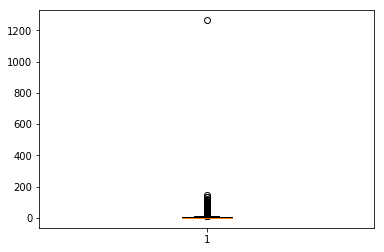

In [17]:
plt.boxplot(risk_df['PARA_B'])

In [18]:
risk_df[risk_df['PARA_B']==1264.630000]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
241,2.72,2,4.28,6.0,2.568,1264.63,6.0,758.778,1268.91,5.5,...,2.4,961.5144,1,4,6,6,0,2,6,1


In [19]:
risk_df.shape

(763, 33)

In [20]:
outlier =risk_df[risk_df.PARA_B != 1264.630000]


{'whiskers': [<matplotlib.lines.Line2D at 0x1235bd278>,
 'caps': [<matplotlib.lines.Line2D at 0x1235bd908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1235bd128>],
 'medians': [<matplotlib.lines.Line2D at 0x1235bdf98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1235c6320>],
 'means': []}

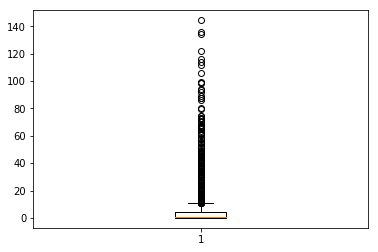

In [21]:
plt.boxplot(outlier['PARA_B'])

In [22]:
outlier[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,762.000000,762.000000
mean,14.320450,8.370946
std,67.127781,40.310310
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.110000,0.021000
75%,5.965000,2.309000
max,935.030000,561.018000


In [23]:
outlier[(outlier['INHERENT_RISK'] == 622.838000) | (outlier['TOTAL'] == 191.360000) | (outlier['MONEY_VALUE'] == 935.030000) |(outlier['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
39,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.4,115.5016,1,2,6,2,0,2,2,1
344,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.4,124.5676,1,2,6,2,0,2,2,1


In [24]:
final_df = outlier[(outlier['INHERENT_RISK'] != 622.838000) & (outlier['TOTAL'] != 191.360000) & (outlier['MONEY_VALUE'] != 935.030000) & (outlier['RISK_D'] != 561.018000)]

In [25]:
final_df

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,0.4,1.714800,1,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,0.4,0.510800,0,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,0.4,0.309600,0,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,0.4,3.506000,1,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,0.4,0.283200,0,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,0.4,0.431200,0,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,0.4,6.354800,1,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,0.4,3.606800,1,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,0.4,3.441200,1,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,0.4,0.874400,0,2,2,2,0,2,2,1


{'whiskers': [<matplotlib.lines.Line2D at 0x12368fb38>,
 'caps': [<matplotlib.lines.Line2D at 0x123677240>,
 'boxes': [<matplotlib.lines.Line2D at 0x12368f9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1236778d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x123677c18>],
 'means': []}

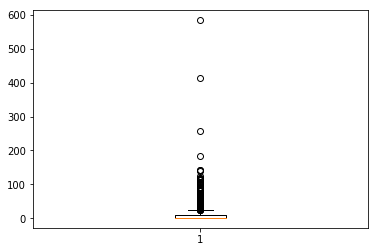

In [26]:
plt.boxplot(final_df['INHERENT_RISK'])

In [27]:
final_df['RISK'] = final_df['RISK_x'] | final_df['RISK_y']

In [28]:
final_df = final_df.drop(['RISK_x','RISK_y'],axis=1)

In [29]:
final_df


,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,8.57400,0.4,1.714800,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,2.55400,0.4,0.510800,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,1.54800,0.4,0.309600,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,17.53000,0.4,3.506000,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,1.41600,0.4,0.283200,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,2.15600,0.4,0.431200,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,31.77400,0.4,6.354800,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,18.03400,0.4,3.606800,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,17.20600,0.4,3.441200,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,4.37200,0.4,0.874400,2,2,2,0,2,2,1


In [30]:
final_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.787842,2.409974,3.528947,1.324648,9.163488,3.139474,5.349245,11.541094,5.068421,0.223947,...,15.393907,0.572632,5.731831,2.239474,2.913158,2.505263,0.030263,2.063158,2.165789,0.634211
std,24.156673,5.372002,1.740536,3.257894,21.567462,1.699886,12.982757,23.734227,0.266590,0.080873,...,36.681740,0.443116,17.036510,0.808727,1.598034,1.226615,0.186161,0.378904,0.672351,0.481968
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,1.400000,0.400000,0.280000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.257500,2.000000,0.051500,0.000000,2.000000,0.000000,0.587500,5.000000,0.200000,...,1.592000,0.400000,0.318400,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.435000,2.000000,0.087000,1.420000,5.000000,0.200000,...,2.228000,0.400000,0.586000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.482500,6.000000,1.489500,4.170000,4.000000,1.995000,7.767500,5.000000,0.200000,...,10.782000,0.400000,3.262500,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,144.390000,6.000000,86.634000,148.230000,9.000000,0.600000,...,583.688000,5.800000,222.009600,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 809
Data columns (total 32 columns):
SECTOR_SCORE     760 non-null float64
LOCATION_ID      760 non-null object
PARA_A           760 non-null float64
SCORE_A          760 non-null float64
RISK_A           760 non-null float64
PARA_B           760 non-null float64
SCORE_B          760 non-null float64
RISK_B           760 non-null float64
TOTAL            760 non-null float64
NUMBERS          760 non-null float64
SCORE_B.1        760 non-null float64
RISK_C           760 non-null float64
MONEY_VALUE      760 non-null float64
SCORE_MV         760 non-null float64
RISK_D           760 non-null float64
DISTRICT_LOSS    760 non-null int64
PROB1            760 non-null float64
RISK_E           760 non-null float64
HISTORY          760 non-null int64
PROB             760 non-null float64
RISK_F           760 non-null float64
SCORE            760 non-null float64
INHERENT_RISK    760 non-null float64
CONTROL_RISK     760 non-n

It is observed that District loss and district have the same values and same affect on the target so dropping one of the two attributes (which is DISTRICT) is done.
It is also observed that MONEY_Marks and Score_MV differ by a constant factor which is the multiplication of 10 (i.e., SCORE_MV*10 is \MONEY_MARKS), so dropping the MONEY_MARKS attribute. 

In [32]:
final_df = final_df.drop(['MONEY_MARKS','DISTRICT'],axis=1)

In [33]:
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE', 'RISK'],
      dtype='object')

## VISUALIZATIONS

##### Plotting the Sector_score vs Risk
 
The plot depicts which attributes of sector score which represents the highest and lowest risk.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

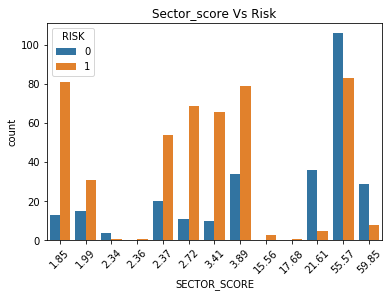

In [34]:
sns.countplot(x='SECTOR_SCORE',data=final_df[['SECTOR_SCORE','RISK']],
              hue="RISK").set_title("Sector_score Vs Risk")
plt.xticks(rotation=45)

#### Plotting of Risk for location_id
The plot depicts which attributes of sector score which represents the highest and lowest risk.
It can be observed that the risk is 1 for location with id 8,23,2, and 16

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

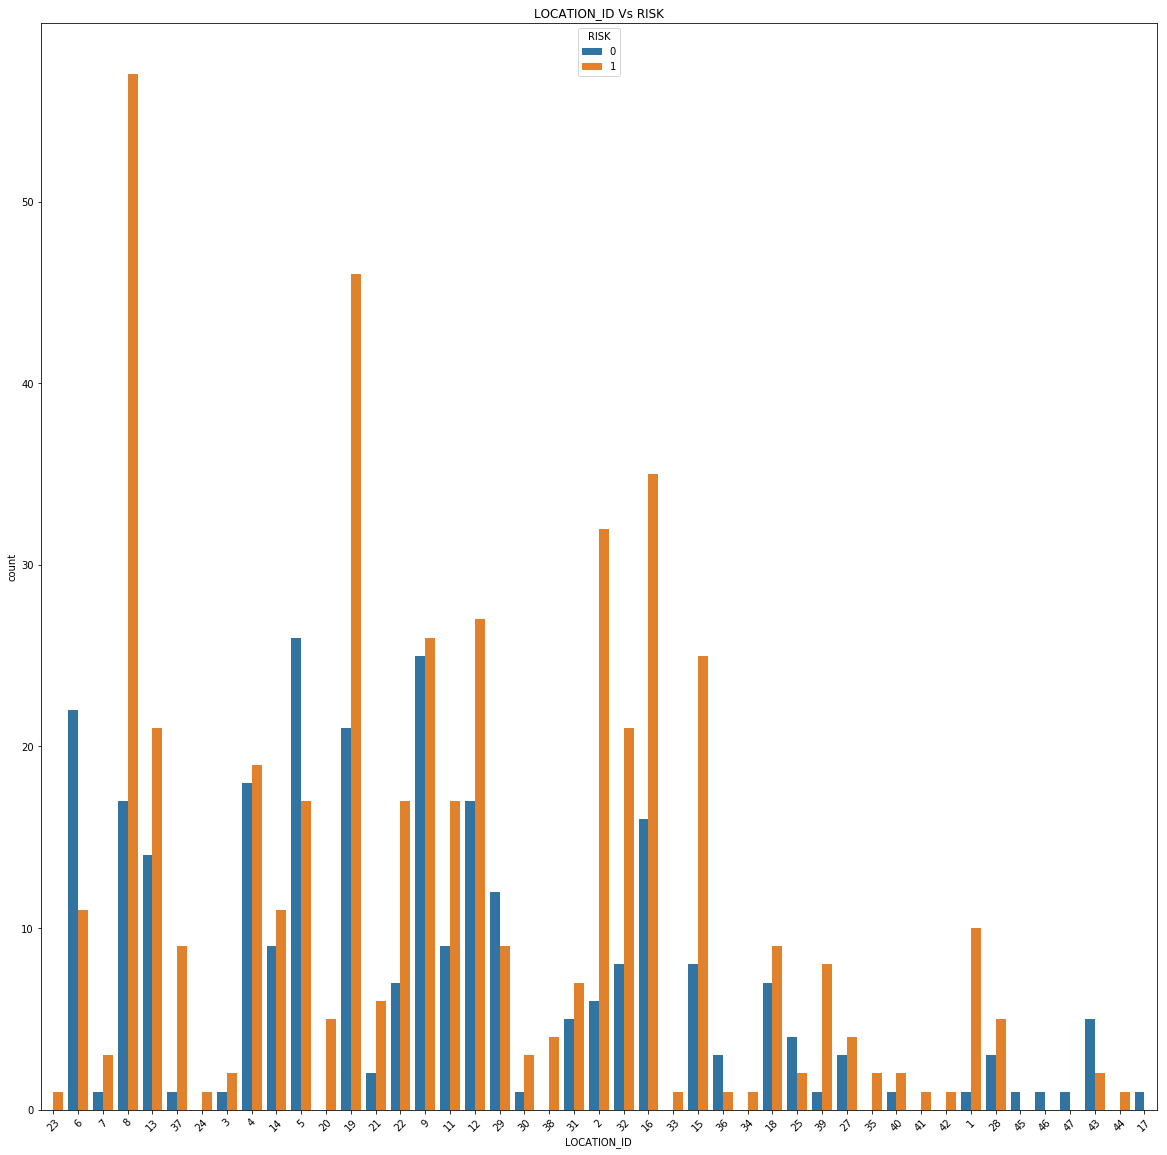

In [35]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='LOCATION_ID',data=final_df[['LOCATION_ID','RISK']],
              hue="RISK").set_title("LOCATION_ID Vs RISK")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

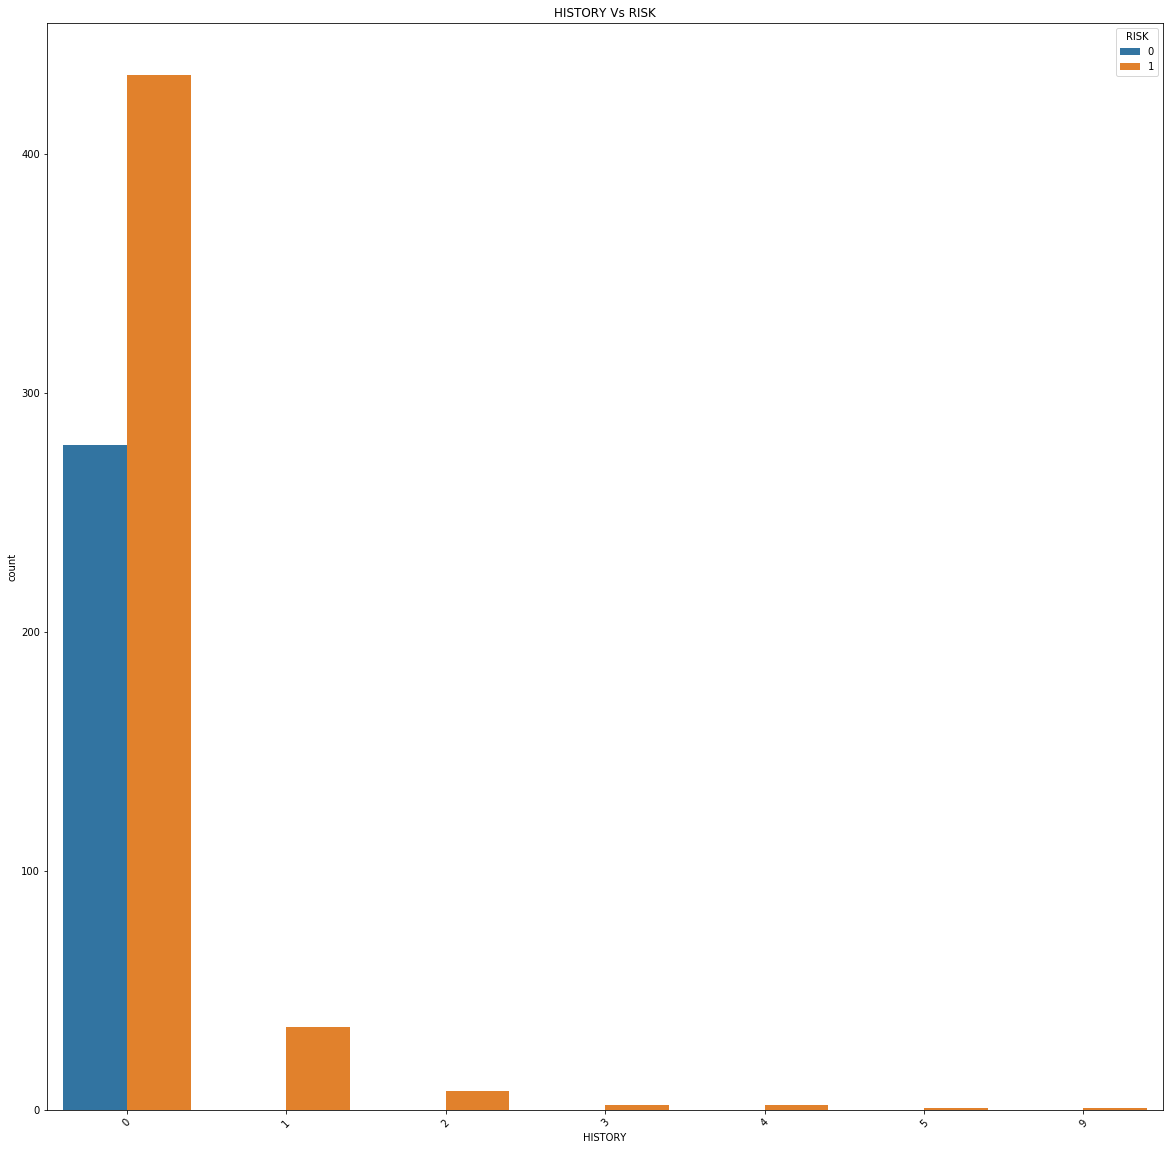

In [36]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='HISTORY',data=final_df[['HISTORY','RISK']],
              hue="RISK").set_title("HISTORY Vs RISK")
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

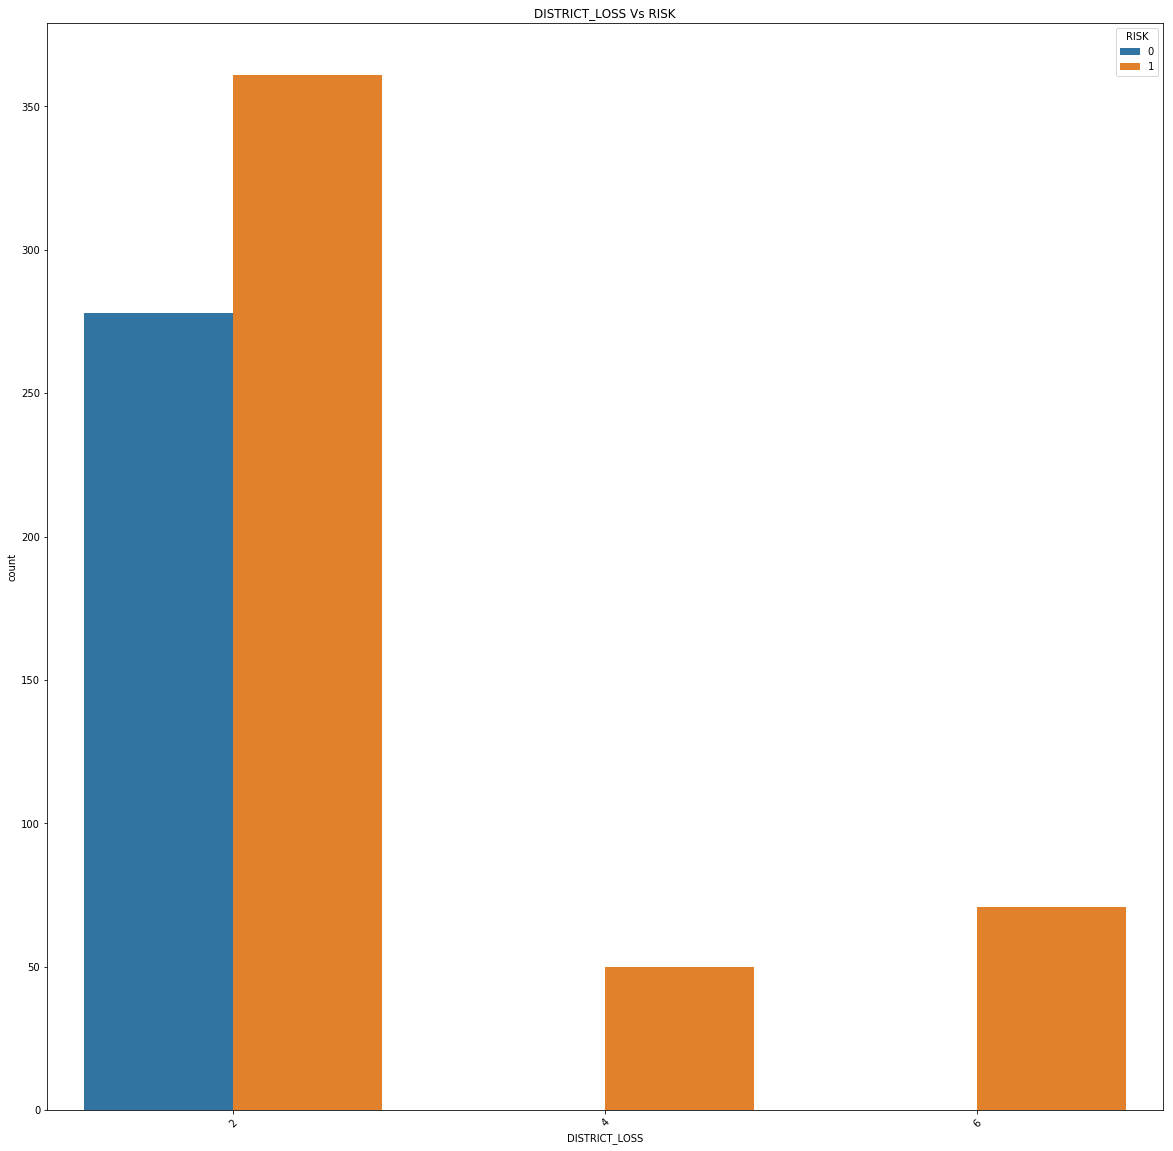

In [37]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='DISTRICT_LOSS',data=final_df[['DISTRICT_LOSS','RISK']],
              hue="RISK").set_title("DISTRICT_LOSS Vs RISK")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

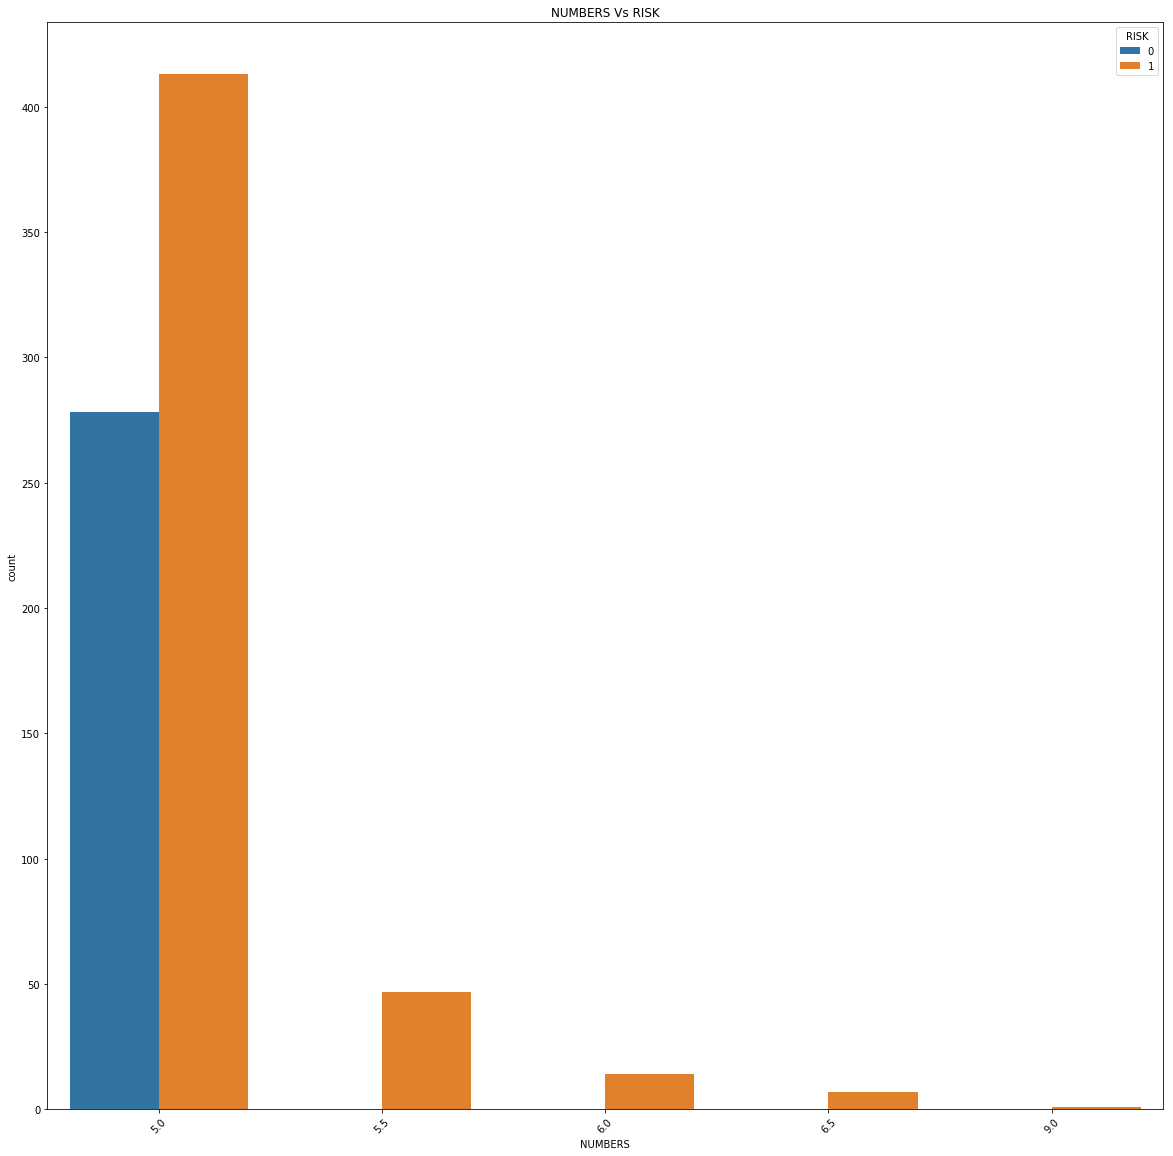

In [38]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='NUMBERS',data=final_df[['NUMBERS','RISK']],
              hue="RISK").set_title("NUMBERS Vs RISK")
plt.xticks(rotation=45)

### Plot for Risk percentage
It is observed that the value_counts for risk=0 and risk=1 are in the same degree. So it can be said that there is no class imbalance problem.

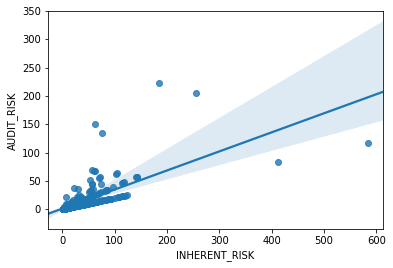

In [39]:
plot1 = sns.regplot("INHERENT_RISK","AUDIT_RISK",data=final_df[final_df["RISK"]==1],scatter=True)

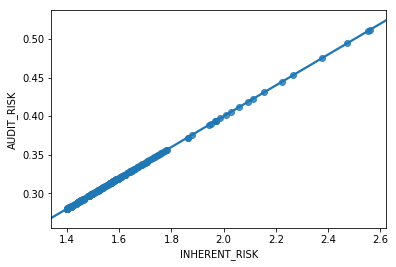

In [40]:
plot2 = sns.regplot("INHERENT_RISK","AUDIT_RISK",data=final_df[final_df["RISK"]==0],scatter=True)

Here it is observed that the linear correlation between INHERENT_RISK and AUDIT_RISK when RISK=0 is not so good.
From the above plots it is can be concluded that, INHERENT_RISK above 3.5 the risk is high which is 1.
The distribution is also different for risk=0 and risk=1.

## Scaling the features and splitting the data into X and y.

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

final_df1 = final_df.copy()
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

y_final_reg = final_df['AUDIT_RISK']# Regression y

y_final_clf = final_df['RISK'] # Classification y
to_scale_x_df = final_df1.drop(["AUDIT_RISK","RISK"], axis =1)

minmax_x_df = to_scale_x_df.copy()
standard_x_df = to_scale_x_df.copy()

num_cols = ['SECTOR_SCORE', 'LOCATION_ID','PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB1', 'RISK_E',
       'HISTORY','RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
        'MARKS', 'LOSS','PROB', 'LOSS_SCORE', 'HISTORY_SCORE']
num_cols = [x.upper() for x in num_cols]

minmax_x_df[num_cols] = minmax_scaler.fit_transform(minmax_x_df[num_cols])       # MinMax scaled X
standard_x_df[num_cols] = standard_scaler.fit_transform(standard_x_df[num_cols])    # Std scaled X
X=minmax_x_df[num_cols]
y=y_final_reg

In [42]:
X.columns
X.shape

(760, 28)

## Correlation Matrix

In [43]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = final_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,RISK_C,MONEY_VALUE,SCORE_MV,RISK_D,DISTRICT_LOSS,PROB1,RISK_E,HISTORY,PROB,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
SECTOR_SCORE,1,-0.22,-0.42,-0.22,-0.25,-0.21,-0.24,-0.27,-0.15,-0.17,-0.16,-0.12,-0.31,-0.12,-0.11,-0.086,-0.13,-0.11,-0.13,-0.099,-0.33,-0.21,-0.15,-0.14,-0.17,-0.082,-0.086,-0.13,-0.36
PARA_A,-0.22,1,0.51,1,0.3,0.36,0.3,0.49,0.14,0.15,0.15,0.4,0.27,0.4,0.14,0.048,0.13,0.13,0.19,0.11,0.43,0.52,0.16,0.41,0.15,0.05,0.048,0.19,0.3
SCORE_A,-0.42,0.51,1,0.52,0.46,0.56,0.46,0.53,0.24,0.27,0.26,0.21,0.47,0.21,0.084,0.093,0.099,0.17,0.26,0.14,0.72,0.38,0.17,0.33,0.27,0.093,0.093,0.26,0.67
RISK_A,-0.22,1,0.52,1,0.3,0.36,0.3,0.5,0.15,0.15,0.15,0.4,0.28,0.39,0.14,0.048,0.13,0.13,0.19,0.11,0.44,0.52,0.17,0.41,0.15,0.05,0.048,0.19,0.29
PARA_B,-0.25,0.3,0.46,0.3,1,0.68,1,0.98,0.37,0.38,0.38,0.19,0.58,0.19,-0.019,0.11,0.01,0.21,0.32,0.18,0.7,0.54,0.13,0.42,0.38,0.12,0.11,0.32,0.31
SCORE_B,-0.21,0.36,0.56,0.36,0.68,1,0.68,0.7,0.28,0.31,0.3,0.2,0.56,0.19,-0.011,0.093,0.01,0.2,0.3,0.16,0.9,0.43,0.12,0.32,0.31,0.099,0.093,0.3,0.51
RISK_B,-0.24,0.3,0.46,0.3,1,0.68,1,0.98,0.37,0.38,0.38,0.19,0.57,0.19,-0.019,0.11,0.011,0.21,0.32,0.18,0.7,0.54,0.13,0.42,0.38,0.12,0.11,0.32,0.31
TOTAL,-0.27,0.49,0.53,0.5,0.98,0.7,0.98,1,0.36,0.37,0.37,0.25,0.58,0.25,0.011,0.11,0.036,0.22,0.33,0.18,0.73,0.6,0.15,0.46,0.37,0.12,0.11,0.33,0.35
NUMBERS,-0.15,0.14,0.24,0.15,0.37,0.28,0.37,0.36,1,0.91,0.96,0.26,0.45,0.26,0.12,0.035,0.13,0.2,0.2,0.2,0.5,0.37,0.22,0.39,0.91,-0.002,0.035,0.2,0.2
SCORE_B.1,-0.17,0.15,0.27,0.15,0.38,0.31,0.38,0.37,0.91,1,0.99,0.31,0.51,0.31,0.14,0.037,0.15,0.22,0.24,0.21,0.56,0.42,0.25,0.44,1,0.0043,0.037,0.24,0.23


## REGRESSION 


In [44]:
## regression
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 427   size of validation set: 143   size of test set: 190



## PASTING
## LINEAR REGRESSION
## K-NN

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train score: 0.8030
Test score: 0.6331
Coefficients: 
 [   2.57010502   -1.47819932  -85.58347207    2.77997734   57.84685091
   34.12570454   -0.68365629  -32.17015855  -15.83474767   -3.81782121
  -34.70179901  119.33191822 -280.27517157    1.27889015  150.26232049
   14.46719141    4.22378861  -81.86462387 -351.20353193  215.9463838
   -3.84887546  301.14537963  185.62615274  -34.70179901    4.22378861
   17.91371568    4.22378861   17.91371568]
mae: 4.055975116968111
mse: 156.47188785613574
rmse: 12.508872365490653


,Coeffecient
SECTOR_SCORE,2.570105
LOCATION_ID,-1.478199
PARA_A,-85.583472
SCORE_A,2.779977
RISK_A,57.846851
PARA_B,34.125705
SCORE_B,-0.683656
RISK_B,-32.170159
TOTAL,-15.834748
NUMBERS,-3.817821


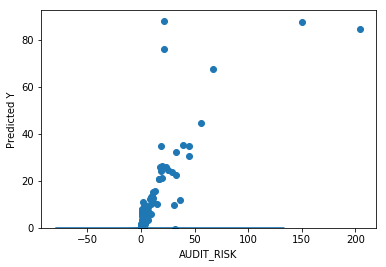

In [45]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_trainval, y_trainval)
print(lreg)
print('Train score: %.4f'%lreg.score(X_trainval, y_trainval))
print('Test score: %.4f'%lreg.score(X_test, y_test))

# The coefficients
print('Coefficients: \n', lreg.coef_)
predictions = lreg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# calculate these metrics by hand!
from sklearn import metrics

print('mae:', metrics.mean_absolute_error(y_test, predictions))
print('mse:', metrics.mean_squared_error(y_test, predictions))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
sns.distplot((y_test-predictions), bins=500)
coeffecients = pd.DataFrame(lreg.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

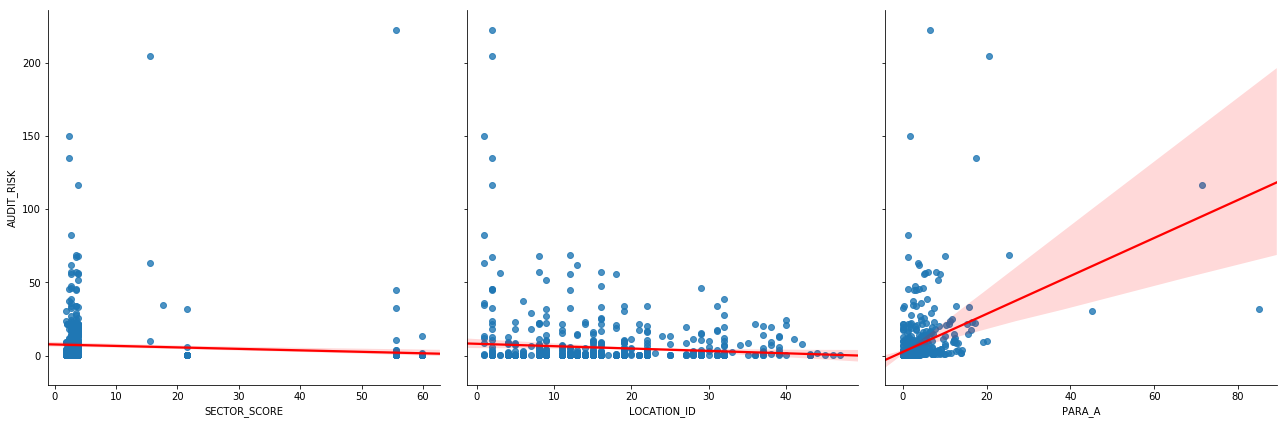

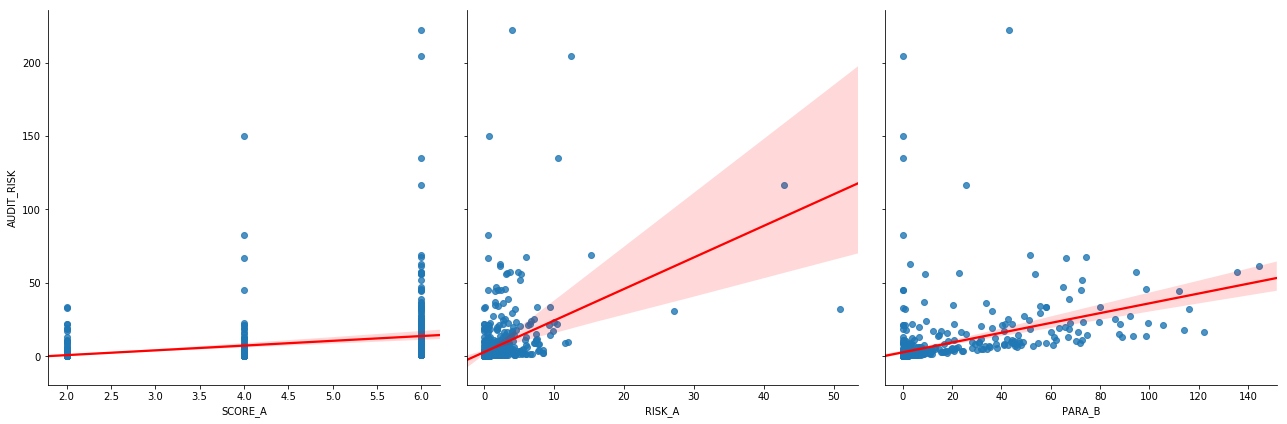

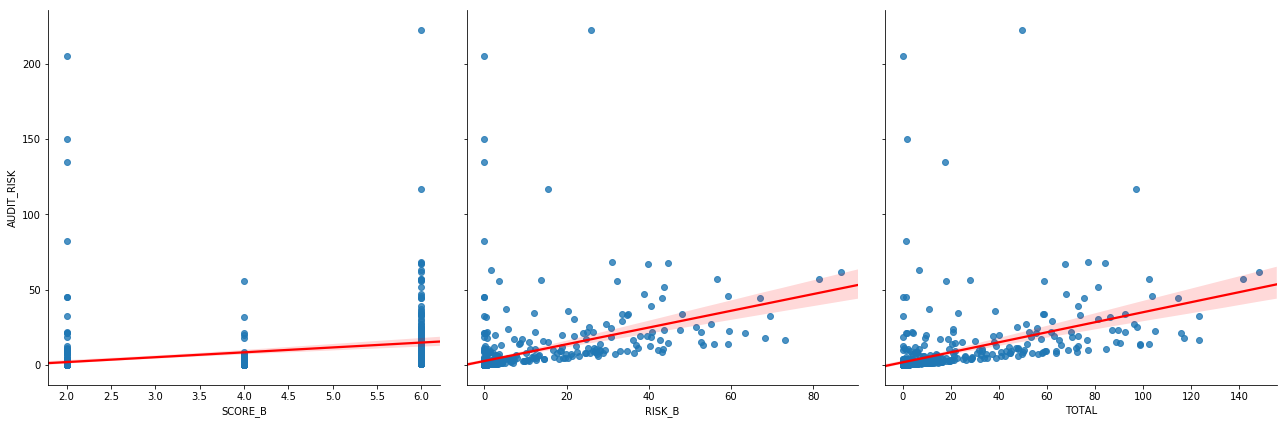

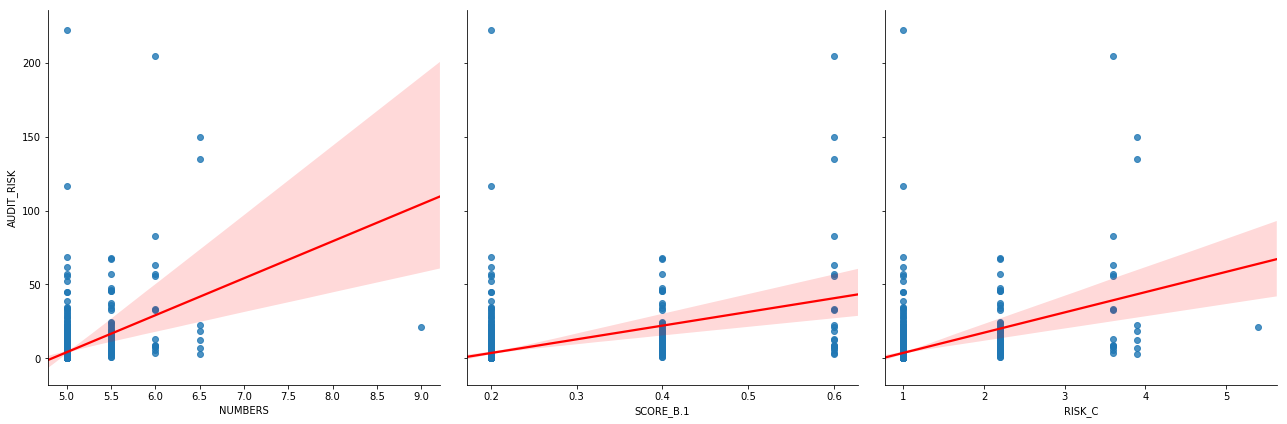

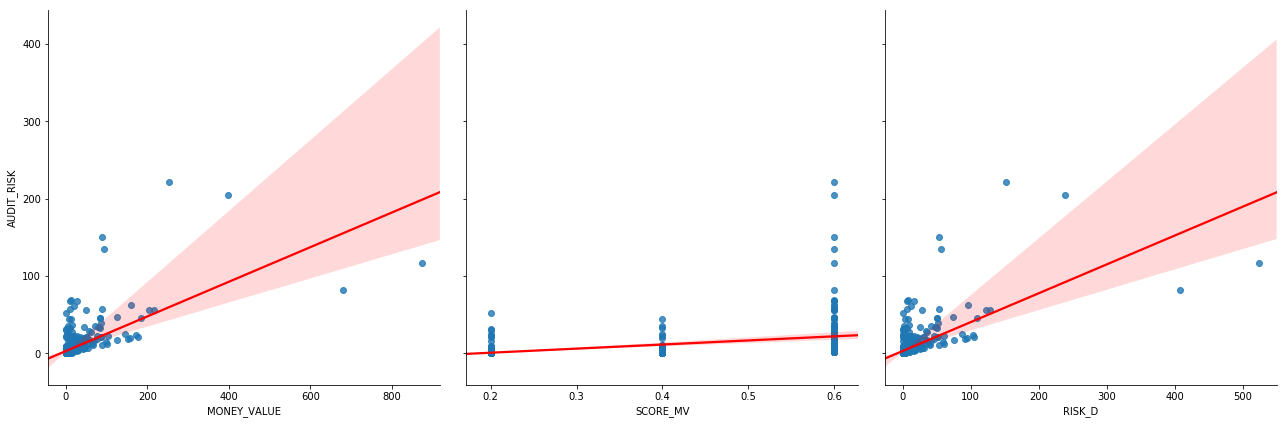

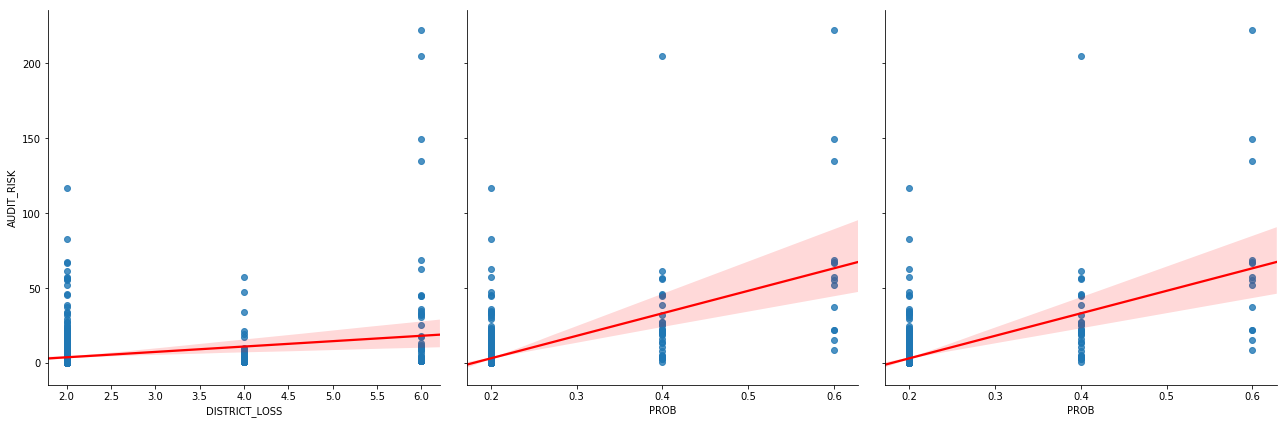

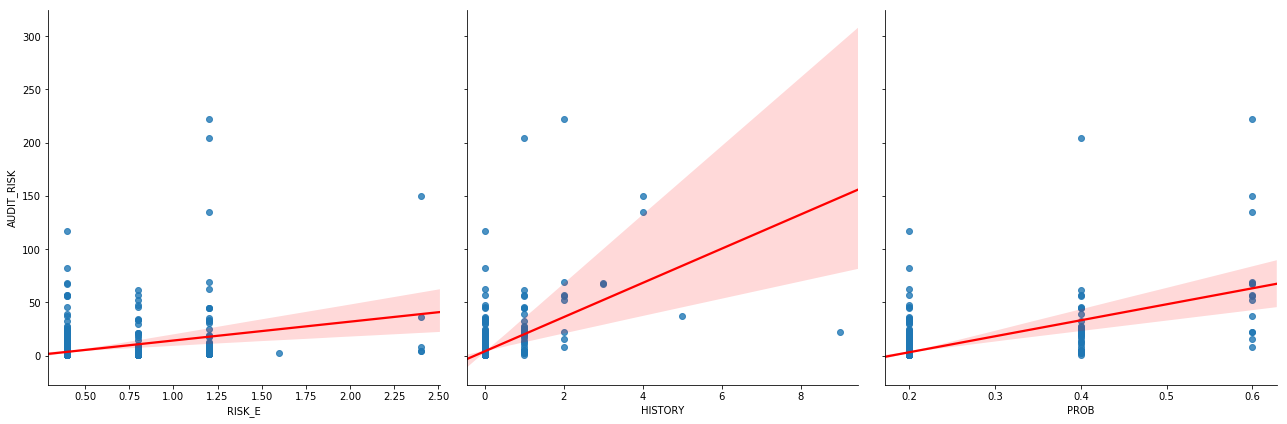

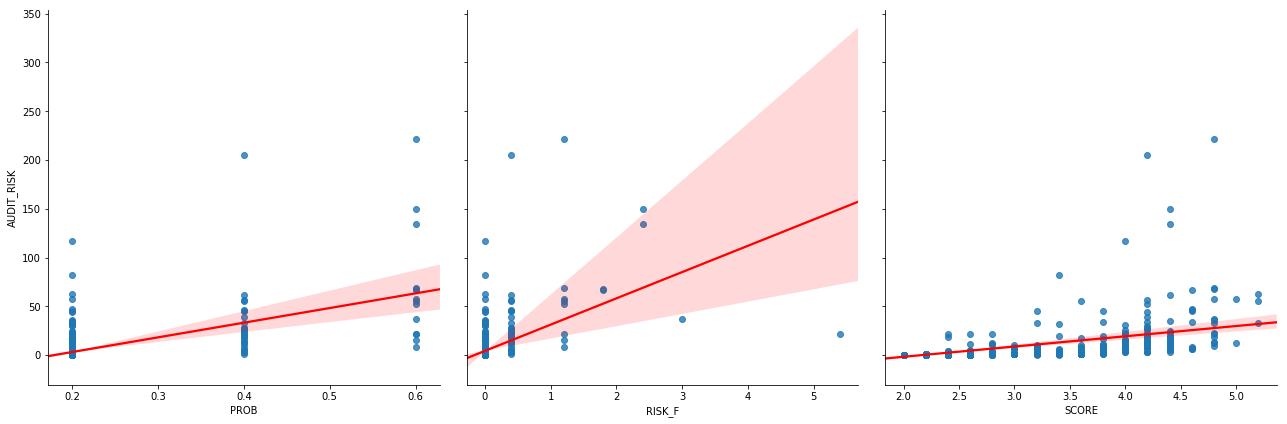

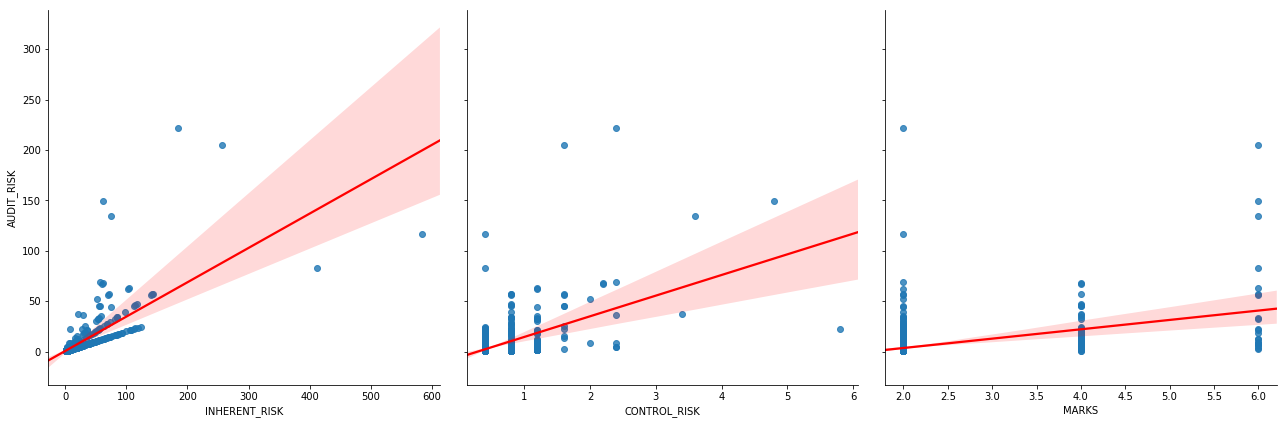

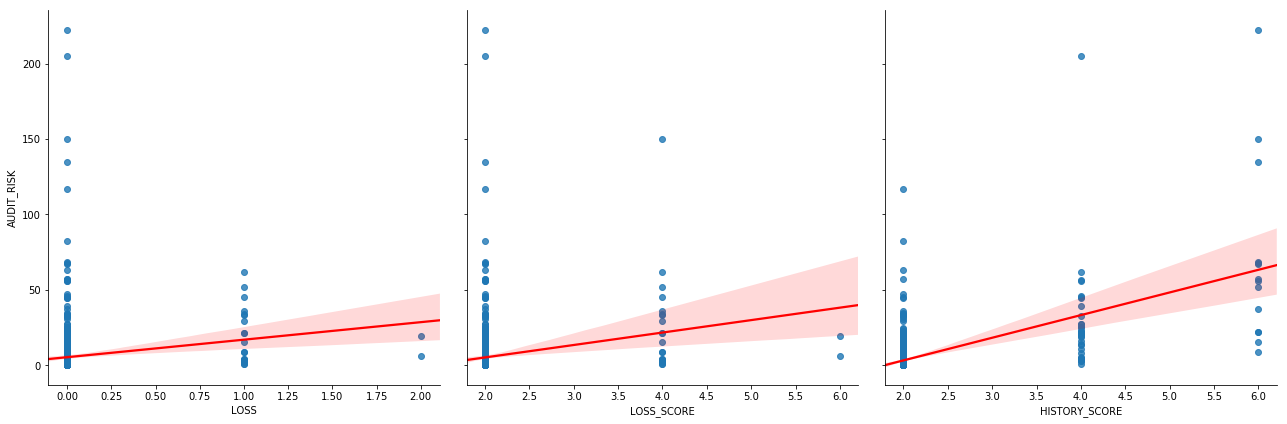

In [46]:
# Regression Relationship
final_df[['LOCATION_ID','RISK']] = final_df[['LOCATION_ID','RISK']].astype('int')

        
sns.pairplot(final_df, x_vars=['SECTOR_SCORE','LOCATION_ID','PARA_A'], y_vars=["AUDIT_RISK"],
             height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['SCORE_A', 'RISK_A', 'PARA_B'], y_vars=["AUDIT_RISK"],
           height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['SCORE_B', 'RISK_B', 'TOTAL'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['NUMBERS', 'SCORE_B.1', 'RISK_C'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6,plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['MONEY_VALUE', 'SCORE_MV', 'RISK_D'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['DISTRICT_LOSS', 'PROB', 'PROB'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['RISK_E', 'HISTORY', 'PROB'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['PROB', 'RISK_F', 'SCORE'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['INHERENT_RISK','CONTROL_RISK', 'MARKS'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

sns.pairplot(final_df, x_vars=['LOSS', 'LOSS_SCORE', 'HISTORY_SCORE'], y_vars=["AUDIT_RISK"],
            height=4.2, aspect=1, kind="reg", size = 6, plot_kws={'line_kws':{'color':'red'}})

In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV


lreg = LinearRegression()
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

lreg_bag = BaggingRegressor(lreg,bootstrap = False, random_state=0)

grid_search = GridSearchCV(lreg_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 50, 'n_estimators': 100}
Best cross-validation score: 0.80


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train score: 0.7319
Test score: 0.6071
mae: 3.153052812767784
mse: 167.55854215421004
rmse: 12.944440588693281


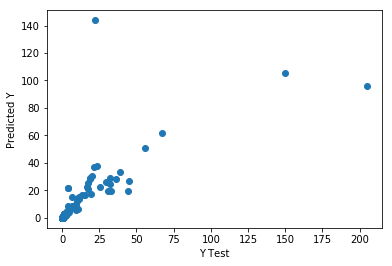

In [48]:
lreg_bag =  BaggingRegressor(lreg, n_estimators=100, max_samples=50, bootstrap=False, random_state=0)
lreg_bag.fit(X_trainval, y_trainval)
print(lreg)
print('Train score: %.4f'%lreg_bag.score(X_trainval, y_trainval))
print('Test score: %.4f'%lreg_bag.score(X_test, y_test))


predictions = lreg_bag.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# calculate these metrics by hand!
from sklearn import metrics

print('mae:', metrics.mean_absolute_error(y_test, predictions))
print('mse:', metrics.mean_squared_error(y_test, predictions))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## PASTING
## K-NN


In [51]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_trainval, y_trainval)
train_score_array.append(knn_reg.score(X_trainval, y_trainval))
test_score_array.append(knn_reg.score(X_test, y_test))
print(train_score_array)
print(test_score_array)

[0.7320188632433133]
[0.5954756658410673]


In [52]:
from sklearn import metrics
knn_tr_pred = knn_reg.predict(X_trainval)
knn_test_pred = knn_reg.predict(X_test)
knn_tr_mse = metrics.mean_squared_error(y_trainval, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('train mse: ', knn_tr_mse)
print('train rmse: ', knn_tr_rmse)

print('test mse: ', knn_test_mse)
print('test rmse: ', knn_test_rmse)

print('train score: ', knn_reg.score(X_trainval, y_trainval))
print('test score: ', knn_reg.score(X_test, y_test) )

train mse:  65.28854587387022
train rmse:  8.080132788133511
test mse:  172.51954320447484
test rmse:  13.134669512571485
train score:  0.7320188632433133
test score:  0.5954756658410673


In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV


knn_reg = KNeighborsRegressor(3)
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

knn_bag = BaggingRegressor(knn_reg,bootstrap = False, random_state=0)

grid_search = GridSearchCV(knn_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Best score on validation set: 0.00
Best parameters: {'max_samples': 150, 'n_estimators': 200}
Best cross-validation score: 0.53


In [56]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(3)
bag_reg =  BaggingRegressor(knn_reg, n_estimators=200, max_samples=150, bootstrap=False, random_state=0)

bag_reg.fit(X_trainval, y_trainval)
y_pred = bag_reg.predict(X_test)

In [57]:
bag_reg.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(bag_reg.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.53
Test score: 0.39


In [58]:
from sklearn import metrics
knn_tr_pred = bag_reg.predict(X_trainval)
knn_test_pred = bag_reg.predict(X_test)
knn_tr_mse = metrics.mean_squared_error(y_trainval, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('train mse: ', knn_tr_mse)
print('train rmse: ', knn_tr_rmse)

print('test mse: ', knn_test_mse)
print('test rmse: ', knn_test_rmse)



train mse:  114.96087376848975
train rmse:  10.72198086961965
test mse:  258.2461124107327
test rmse:  16.070037722753877


## BAGGING 

## RIDGE

In [59]:
## ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001)
ridge.fit(X_trainval,y_trainval)
print('Train score: {:.4f}'.format(ridge.score(X_trainval,y_trainval)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8026
Test score: 0.6293


In [60]:
ridge_reg = Ridge(alpha = 0.001)
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

rid_bag = BaggingRegressor(ridge_reg,bootstrap = True, random_state=0)

grid_search = GridSearchCV(rid_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 50, 'n_estimators': 200}
Best cross-validation score: 0.79


In [61]:
ridge_reg = Ridge(alpha = 0.001)
from sklearn.ensemble import BaggingRegressor
bag_reg =  BaggingRegressor(ridge_reg, n_estimators=200, max_samples=50, bootstrap=True, random_state=0)

bag_reg.fit(X_trainval, y_trainval)
y_pred = bag_reg.predict(X_test)

In [62]:
bag_reg.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(bag_reg.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.75
Test score: 0.67


In [63]:
from sklearn import  metrics
ridge_tr_pred = bag_reg.predict(X_trainval)
ridge_test_pred =bag_reg.predict(X_test)
ridge_tr_mse = metrics.mean_squared_error(y_trainval,ridge_tr_pred)
ridge_tr_rmse = np.sqrt(ridge_tr_mse)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print('train mse: ', ridge_tr_mse)
print('train rmse: ', ridge_tr_rmse)

print('test mse: ', ridge_test_mse)
print('test rmse: ', ridge_test_rmse)

train mse:  62.121805295649466
train rmse:  7.881738722873873
test mse:  140.9208380423021
test rmse:  11.87100829931064


## LASSO - BAGGING

In [64]:
## lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)
lasso.fit(X_trainval,y_trainval)
print('Train score: {:.4f}'.format(lasso.score(X_trainval,y_trainval)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.8015
Test score: 0.6292


In [65]:
lasso_reg = Lasso(alpha = 0.001)
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

lass_bag = BaggingRegressor(lasso_reg,bootstrap = True, random_state=0)

grid_search = GridSearchCV(lass_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'max_samples': 50, 'n_estimators': 200}
Best cross-validation score: 0.79


In [66]:
lasso_reg = Lasso(alpha = 0.001)
bag_reg =  BaggingRegressor(lasso_reg, n_estimators=200, max_samples=50, bootstrap=True, random_state=0)

bag_reg.fit(X_trainval, y_trainval)


BaggingRegressor(base_estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=50, n_estimators=200, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [67]:
bag_reg.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(bag_reg.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.76
Test score: 0.62


In [68]:
from sklearn import  metrics
lasso_tr_pred = bag_reg.predict(X_trainval)
lasso_test_pred =bag_reg.predict(X_test)
lasso_tr_mse = metrics.mean_squared_error(y_trainval,lasso_tr_pred)
lasso_tr_rmse = np.sqrt(lasso_tr_mse)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print('train mse: ', lasso_tr_mse)
print('train rmse: ', lasso_tr_rmse)

print('test mse: ', lasso_test_mse)
print('test rmse: ', lasso_test_rmse)

train mse:  59.63009604447766
train rmse:  7.722052579753498
test mse:  161.67173413037472
test rmse:  12.715020020840498


## ADABOOST - SVM  (KERNEL -'LINEAR')& SVM (KERNEL -'RBF')

In [69]:
##svm

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

In [70]:
from sklearn import svm
svm_r = svm.SVR(kernel='linear', C = 100)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))





svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))

Train Score: 0.6907917684951009
Train Score: 0.5668714753016784
train mse:  75.33274935509861
train rmse:  8.679444069472343
test mse:  184.71851733009643
test rmse:  13.591119060993337
Train Score: 0.6907917684951009
Train Score: 0.5668714753016784


In [71]:
from sklearn.ensemble import AdaBoostRegressor
svm_r = svm.SVR(kernel='linear', C = 100)

n_estimators_vals = [100, 200, 300, 400, 500]
learning_rate_vals = [0.01, 0.1, 0.3, 0.5, 1.0]


param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals)
svm_r_bag = AdaBoostRegressor(svm_r, random_state=0)
grid_search = GridSearchCV(svm_r_bag, param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best cross-validation score: 0.71


In [72]:

svm_r = svm.SVR(kernel='linear', C = 100)
ada_reg =  AdaBoostRegressor(svm_r, n_estimators=100, learning_rate=0.01, random_state=0)

ada_reg.fit(X_trainval, y_trainval)
y_pred = ada_reg.predict(X_test)

In [73]:
ada_reg.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(ada_reg.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(ada_reg.score(X_test, y_test)))

Train score: 0.75
Test score: 0.58


In [74]:
svmr_tr_pred = ada_reg.predict(X_trainval)
svmr_test_pred = ada_reg.predict(X_test)
print('Train Score:',ada_reg.score(X_trainval,y_trainval))      
print('Train Score:',ada_reg.score(X_test, y_test))





svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)
print('Train Score:',ada_reg.score(X_trainval,y_trainval))      
print('Train Score:',ada_reg.score(X_test, y_test))

Train Score: 0.7536339216199942
Train Score: 0.577316640535182
train mse:  60.022444880822995
train rmse:  7.7474153677741455
test mse:  180.26391476947197
test rmse:  13.42623978519198
Train Score: 0.7536339216199942
Train Score: 0.577316640535182


In [75]:
from sklearn.ensemble import AdaBoostRegressor
svm_r = svm.SVR(kernel='rbf', C = 100,gamma=0.1)

n_estimators_vals = [100, 200, 300, 400, 500]
learning_rate_vals = [0.01, 0.1, 0.3, 0.5, 1.0]


param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals)
svm_r_bag = AdaBoostRegressor(svm_r, random_state=0)
grid_search = GridSearchCV(svm_r_bag, param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals), cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best cross-validation score: 0.78


In [76]:
svm_r = svm.SVR(kernel='rbf', C = 100,gamma=0.1)
ada_reg_rbf =  AdaBoostRegressor(svm_r, n_estimators=100, learning_rate=0.01, random_state=0)

ada_reg_rbf.fit(X_trainval, y_trainval)
y_pred = ada_reg_rbf.predict(X_test)

In [77]:
ada_reg_rbf.fit(X_trainval, y_trainval)
print('Train score: {:.2f}'.format(ada_reg.score(X_trainval, y_trainval)))
print('Test score: {:.2f}'.format(ada_reg.score(X_test, y_test)))

Train score: 0.75
Test score: 0.58


## GRADIENT BOOSTING - DECISION TREE

In [78]:
## gradient boosting ## decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score , GridSearchCV

dt = DecisionTreeRegressor()
max_depth_vals=[4,6,8,10]
param_grid = dict(max_depth = max_depth_vals)

gs_dt = GridSearchCV(dt, param_grid = dict(max_depth = max_depth_vals), return_train_score=True)


gs_dt
gs_dt.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(gs_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(gs_dt.best_score_))



Best parameters: {'max_depth': 8}
Best cross-validation score: 0.31


In [79]:


from  sklearn.ensemble import GradientBoostingRegressor


In [80]:
dt_r = DecisionTreeRegressor(max_depth=8)
n_estimators_vals = [1,2,3,4,5]
learning_rate_vals = [0.01, 0.1, 0.3, 0.5, 1.0]


param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals)
gbrt = GradientBoostingRegressor(dt_r , random_state=0)
gs_dt_r = GridSearchCV(gbrt, param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals), cv=10, return_train_score=True)
gs_dt_r

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1,
             loss=DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, ...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.1, 0.3, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [81]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=8, n_estimators=100, learning_rate=1.0, random_state=42)
gbrt.fit(X_trainval, y_trainval)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.734


## DEEP NEURAL NETWORKS

In [83]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [84]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 28, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'mse' , optimizer = 'adam',metrics = ['mse'] )

#step 3: train the model - fit
model1.fit(X_trainval, y_trainval, epochs = 10, batch_size = 400)


Epoch 1/10
570/570 [==============================] - 0s 540us/sample - loss: 269.3941 - mse: 269.3940
Epoch 2/10
570/570 [==============================] - 0s 16us/sample - loss: 269.3091 - mse: 269.3091
Epoch 3/10
570/570 [==============================] - 0s 16us/sample - loss: 269.2346 - mse: 269.2346
Epoch 4/10
570/570 [==============================] - 0s 15us/sample - loss: 269.1565 - mse: 269.1565
Epoch 5/10
570/570 [==============================] - 0s 15us/sample - loss: 269.0815 - mse: 269.0815
Epoch 6/10
570/570 [==============================] - 0s 13us/sample - loss: 269.0021 - mse: 269.0021
Epoch 7/10
570/570 [==============================] - 0s 13us/sample - loss: 268.9285 - mse: 268.9285
Epoch 8/10
570/570 [==============================] - 0s 13us/sample - loss: 268.8522 - mse: 268.8522
Epoch 9/10
570/570 [==============================] - 0s 10us/sample - loss: 268.7801 - mse: 268.7801
Epoch 10/10
570/570 [==============================] - 0s 12us/sample - loss: 268

In [85]:

model1.evaluate(X_trainval, y_trainval)

570/570 [==============================] - 0s 138us/sample - loss: 268.6410 - mse: 268.6410


[268.6409908896998, 268.64102]

In [86]:
model1.evaluate(X_test, y_test)

190/190 [==============================] - 0s 48us/sample - loss: 470.6174 - mse: 470.6174


[470.6173774317691, 470.6174]

## PCA

In [87]:
## PCA
from sklearn.decomposition import PCA



pca = PCA().fit(X)

In [88]:
# split data into train+validation set and test set
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 427   size of validation set: 143   size of test set: 190



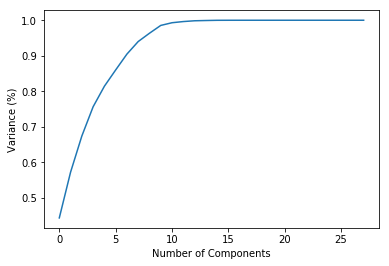

In [89]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.show()

In [90]:
pca = PCA(n_components=10)

X_trainval = pca.fit_transform(X_trainval)
X_test = pca.transform(X_test)

In [91]:
X_trainval.shape

(570, 10)

In [92]:
X_test.shape

(190, 10)

In [93]:
pca.explained_variance_

array([0.54648817, 0.15677541, 0.11442812, 0.09373685, 0.06799377,
       0.05431175, 0.05284199, 0.04260057, 0.02769211, 0.02306682])

In [94]:
pca.n_components_

10

In [95]:
pca.explained_variance_ratio_

array([0.45800748, 0.13139225, 0.09590131, 0.07856012, 0.05698505,
       0.04551826, 0.04428646, 0.03570321, 0.02320854, 0.01933212])

In [96]:
np.sum(pca.explained_variance_ratio_)

0.9888948001436745

## knn after pca

Text(0, 0.5, 'MSE')

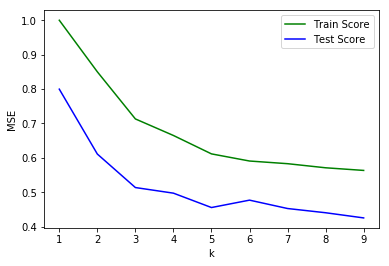

In [97]:
## K-NN
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_trainval, y_trainval)
    train_score_array.append(knn_reg.score(X_trainval, y_trainval))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [98]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])
k_range = [1,3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'n_neighbors': 12, 'weights': 'distance'}
Best cross-validation score: 0.55


In [99]:

%matplotlib inline
train_score_array = []
test_score_array = []

knn_reg = KNeighborsRegressor(12)
knn_reg.fit(X_trainval, y_trainval)
train_score_array.append(knn_reg.score(X_trainval, y_trainval))
test_score_array.append(knn_reg.score(X_test, y_test))
print(train_score_array)
print(test_score_array)

[0.5155738696610259]
[0.4006740650878794]


In [100]:
from sklearn import metrics
knn_tr_pred = knn_reg.predict(X_trainval)
knn_test_pred = knn_reg.predict(X_test)
knn_tr_mse = metrics.mean_squared_error(y_trainval, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('train mse: ', knn_tr_mse)
print('train rmse: ', knn_tr_rmse)

print('test mse: ', knn_test_mse)
print('test rmse: ', knn_test_rmse)

print('train score: ', knn_reg.score(X_trainval, y_trainval))
print('test score: ', knn_reg.score(X_test, y_test) )

train mse:  118.02128319895026
train rmse:  10.863760085667865
test mse:  255.59756927011227
test rmse:  15.98741909346572
train score:  0.5155738696610259
test score:  0.4006740650878794


## RIDGE

In [101]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_trainval,y_trainval)
    train_score_list.append(ridge.score(X_trainval,y_trainval))
    test_score_list.append(ridge.score(X_test, y_test))

In [102]:
print(train_score_list)
print(test_score_list)

[0.5637408359710565, 0.5637379200352792, 0.5634682831374703, 0.5488453178160064, 0.40890653604495775]
[0.5406648171969268, 0.5404895824894862, 0.5385399783061848, 0.5104433778801704, 0.3317549840472179]


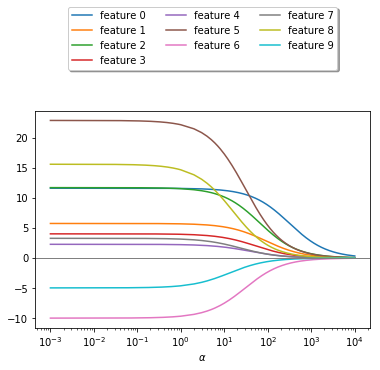

In [103]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_trainval,y_trainval)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [104]:
from sklearn.linear_model import Ridge
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    
        ridge =Ridge()
        scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            

ridge = Ridge(**best_parameters)
ridge.fit(X_trainval, y_trainval)
test_score = ridge.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.50
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.54


In [105]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_trainval,y_trainval)
print('Train score: {:.4f}'.format(ridge.score(X_trainval,y_trainval)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.5637
Test score: 0.5407


In [106]:
from sklearn import  metrics
ridge_tr_pred = ridge.predict(X_trainval)
ridge_test_pred =ridge.predict(X_test)
ridge_tr_mse = metrics.mean_squared_error(y_trainval,ridge_tr_pred)
ridge_tr_rmse = np.sqrt(ridge_tr_mse)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print('train mse: ', ridge_tr_mse)
print('train rmse: ', ridge_tr_rmse)

print('test mse: ', ridge_test_mse)
print('test rmse: ', ridge_test_rmse)

train mse:  106.28630383878564
train rmse:  10.30952490849048
test mse:  195.88762308759763
test rmse:  13.995985963396706


## Lasso

In [107]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_trainval,y_trainval)
    train_score_list.append(lasso.score(X_trainval,y_trainval))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

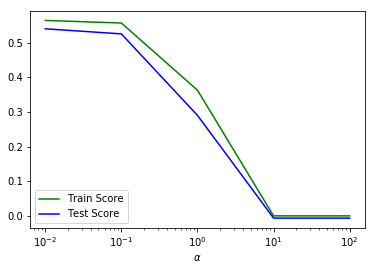

In [108]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

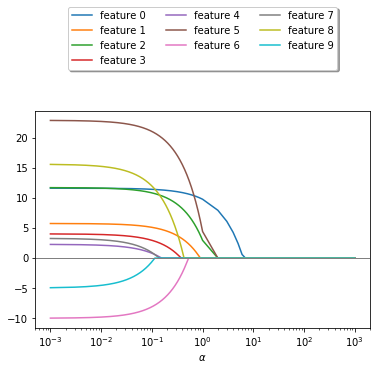

In [109]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_trainval,y_trainval)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [110]:
from sklearn.linear_model import Lasso
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:   
        lasso =Lasso()
        # perform cross-validation
        scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
lasso = Lasso(**best_parameters)
lasso.fit(X_trainval, y_trainval)
test_score = lasso.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on validation set: 0.50
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.54


In [111]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_trainval,y_trainval)
print('Train score: {:.4f}'.format(lasso.score(X_trainval,y_trainval)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.5637
Test score: 0.5406


In [112]:
from sklearn import  metrics
lasso_tr_pred = lasso.predict(X_trainval)
lasso_test_pred =lasso.predict(X_test)
lasso_tr_mse = metrics.mean_squared_error(y_trainval,lasso_tr_pred)
lasso_tr_rmse = np.sqrt(lasso_tr_mse)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print('train mse: ', lasso_tr_mse)
print('train rmse: ', lasso_tr_rmse)

print('test mse: ', lasso_test_mse)
print('test rmse: ', lasso_test_rmse)

train mse:  106.2864866843214
train rmse:  10.309533776283068
test mse:  195.9317100969227
test rmse:  13.997560862411804


## POLYNOMIAL

In [113]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_trainval)
    X_test_poly = poly.transform(X_test) 
    lreg.fit(X_train_poly, y_trainval)
    train_score_list.append(lreg.score(X_train_poly, y_trainval))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [114]:
print(train_score_list)
print(test_score_list)

[0.5637408656641261, 0.890351549029197]
[0.5406840435699396, -0.8012171878312833]


In [115]:
poly_train_pred = lreg.predict(X_train_poly)
poly_test_pred =lreg.predict(X_test_poly)
poly_mse = metrics.mean_squared_error(y_trainval,poly_train_pred)
poly_rmse = np.sqrt(poly_mse)
poly_test_mse = metrics.mean_squared_error(y_test, poly_test_pred)
poly_test_rmse = np.sqrt(poly_test_mse)

print('train mse: ', poly_mse)
print('train rmse: ', poly_rmse)

print('test mse: ', poly_test_mse)
print('test rmse: ', poly_test_rmse)



print(train_score_list)
print(test_score_list)

train mse:  26.713775483779294
train rmse:  5.168537073851681
test mse:  768.1742239383149
test rmse:  27.715956125277636
[0.5637408656641261, 0.890351549029197]
[0.5406840435699396, -0.8012171878312833]


## DECISION TREE

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score , GridSearchCV

DT_r = DecisionTreeRegressor()
max_depth_vals=[4,6,8,10]
param_grid = dict(max_depth = max_depth_vals)

DT_r = GridSearchCV(dt, param_grid = dict(max_depth = max_depth_vals), return_train_score=True)


DT_r
DT_r.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(gs_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(gs_dt.best_score_))

Best parameters: {'max_depth': 8}
Best cross-validation score: 0.31


In [117]:

DT_tr_pred = DT_r.predict(X_trainval)
DT_test_pred = DT_r.predict(X_test)
lreg = LinearRegression().fit(X_trainval, y_trainval)

pred_lr = lreg.predict(X_trainval)
pred_test =lreg.predict(X_test)

In [118]:
pred_lr 
pred_test


array([-2.63519962e+00,  3.53461041e+00,  3.44362076e+00, -2.56649059e+00,
        2.79849020e+01,  7.11542046e-01, -3.97745982e+00,  1.36882514e+01,
        8.48771320e+00, -3.53406426e+00,  2.62456252e+00,  1.69747209e+01,
       -1.16007246e+00, -1.11722832e+00, -3.59136018e+00,  8.93937669e-01,
       -5.64235102e+00, -1.16007699e+00, -3.48059932e+00, -1.35671627e+00,
        2.24969537e+00,  3.26183107e-01,  4.81662008e+01, -6.72636071e-01,
       -4.95518699e+00,  1.59171167e+00,  1.76970927e+01,  5.68857937e+00,
       -2.31612450e+00,  8.41625206e+00,  4.68308349e+01,  1.79188625e+01,
        1.58018910e+01,  1.97535449e+00, -1.22303626e+00,  2.11627477e+01,
        2.11322202e+00,  3.31841300e+00,  7.16273157e+00, -1.50602000e+00,
        1.74426291e+01,  1.13115737e-01,  4.44194747e+00,  1.90398436e+00,
        8.56303118e-01,  1.64420069e+00,  5.78998853e-01, -6.26911775e+00,
        1.62777535e+01,  7.54923577e+00, -1.12158861e-01,  6.16811808e-01,
        7.46831541e+00,  

In [119]:
print('Train Score:',DT_r.score(X_trainval,y_trainval))      
print('Train Score:',DT_r.score(X_test, y_test))

Train Score: 0.902752635529122
Train Score: 0.18565418928743893


In [120]:
from sklearn import  metrics
pred_lr = lreg.predict(X_trainval)
pred_test =lreg.predict(X_test)
pred_lr_mse = metrics.mean_squared_error(y_trainval,pred_lr)
pred_lr_rmse = np.sqrt(pred_lr_mse)
pred_test_mse = metrics.mean_squared_error(y_test, pred_test)
pred_test_rmse = np.sqrt(pred_test_mse)

print('train mse: ', pred_lr_mse)
print('train rmse: ', pred_lr_rmse)

print('test mse: ', pred_test_mse)
print('test rmse: ', pred_test_rmse)

train mse:  106.28630376638594
train rmse:  10.30952490497918
test mse:  195.88680407717476
test rmse:  13.995956704604897


## SVM

In [121]:
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.65


In [122]:
# SVM Linear


from sklearn import svm
svm_r = svm.SVR(kernel='linear', C = 100)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))





svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))

Train Score: 0.44163664558578086
Train Score: 0.33619196954353325
train mse:  136.0346922927633
train rmse:  11.663391114627139
test mse:  283.0975753978209
test rmse:  16.825503718992216
Train Score: 0.44163664558578086
Train Score: 0.33619196954353325


In [123]:
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.65


In [124]:
svm_r = svm.SVR(kernel='rbf', C = 100,gamma=0.1)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)

svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))

train mse:  98.2697008098666
train rmse:  9.913107525386105
test mse:  216.65999307045502
test rmse:  14.719374751342361
Train Score: 0.5966455405111555
Train Score: 0.4919750086990059


In [125]:
mse = svm_test_mse
rmse = svm_test_rmse


In [126]:
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'degree': [1,2,3]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 1}
Best cross-validation score: 0.65


In [127]:
svm_r = svm.SVR(kernel='poly', C = 100, degree=1)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)

svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)
print('Train Score:',svm_r.score(X_trainval,y_trainval))      
print('Train Score:',svm_r.score(X_test, y_test))

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)

Train Score: 0.43365936552140305
Train Score: 0.3276526904387559
train mse:  137.97820601068864
train rmse:  11.746412474057287
test mse:  286.7393650407473
test rmse:  16.933380201269543


## RANDOM FOREST

In [128]:
from sklearn.ensemble import RandomForestRegressor

estimator = [20,50,70]
max_features_val= [10,15,20]

param_grid = dict(n_estimators=estimator, max_features=max_features_val)
print(param_grid)


{'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]}


In [129]:
randomforest = RandomForestRegressor()

rfgs = GridSearchCV(randomforest, param_grid = param_grid, cv=10, scoring='r2')
rfgs.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [130]:
rfgs.best_score_

0.8768902413664813

In [131]:
rfgs.best_params_

{'max_features': 15, 'n_estimators': 70}

In [132]:
randomforest_best = RandomForestRegressor(n_estimators= 50,max_features= 20 )

## DEEP NEURAL NETWORKS AFTER PCA

In [134]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 10, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'mse' , optimizer = 'adam',metrics = ['mse'] )

#step 3: train the model - fit
model1.fit(X_trainval, y_trainval, epochs = 10, batch_size = 400)

Epoch 1/10
570/570 [==============================] - 0s 610us/sample - loss: 267.6589 - mse: 267.6589
Epoch 2/10
570/570 [==============================] - 0s 15us/sample - loss: 267.6203 - mse: 267.6203
Epoch 3/10
570/570 [==============================] - 0s 17us/sample - loss: 267.5827 - mse: 267.5827
Epoch 4/10
570/570 [==============================] - 0s 17us/sample - loss: 267.5456 - mse: 267.5456
Epoch 5/10
570/570 [==============================] - 0s 17us/sample - loss: 267.5052 - mse: 267.5052
Epoch 6/10
570/570 [==============================] - 0s 11us/sample - loss: 267.4706 - mse: 267.4706
Epoch 7/10
570/570 [==============================] - 0s 12us/sample - loss: 267.4321 - mse: 267.4321
Epoch 8/10
570/570 [==============================] - 0s 12us/sample - loss: 267.3936 - mse: 267.3936
Epoch 9/10
570/570 [==============================] - 0s 16us/sample - loss: 267.3543 - mse: 267.3543
Epoch 10/10
570/570 [==============================] - 0s 24us/sample - loss: 267

In [ ]:
# CONCLUSION:  

### The file consists of regression models with Bagging, Pasting, Adaboost, Gradient Boosting, Deep Neural Network and pca applied on them.

#### The boosting algorithms were applied on the previous project models with best parameters to reduce the error in the model.

## The following are the results of the regression :  
    
    
## Pasting - Linear Regression
Train score: 0.7319
Test score: 0.6071
mae: 3.153052812767784
mse: 167.55854215421004
rmse: 12.944440588693281
    #K-NN
Train score: 0.53
Test score: 0.39
train mse:  114.96087376848975
train rmse:  10.72198086961965
test mse:  258.2461124107327
test rmse:  16.070037722753877
    
## Bagging 
# Ridge 
Train score: 0.75
Test score: 0.67
train mse:  62.121805295649466
train rmse:  7.881738722873873
test mse:  140.9208380423021
test rmse:  11.87100829931064
#Lasso.
Train score: 0.76
Test score: 0.62
train mse:  59.63009604447766
train rmse:  7.722052579753498
test mse:  161.67173413037472
test rmse:  12.715020020840498

# Adaboost 
## SVM (LINEAR KERNEL)
 Train Score: 0.7536339216199942
Train Score: 0.577316640535182
train mse:  60.022444880822995
train rmse:  7.7474153677741455
test mse:  180.26391476947197
test rmse:  13.42623978519198
Train Score: 0.7536339216199942
Train Score: 0.577316640535182

## SVM (RBF)
Train score: 0.75
Test score: 0.58
# Gradient Boosting - Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.734

# Deep Neural Networks
570/570 [==============================] - 0s 138us/sample - loss: 268.6410 - mse: 268.6410
Out[85]:
[268.6409908896998, 268.64102]

190/190 [==============================] - 0s 48us/sample - loss: 470.6174 - mse: 470.6174
Out[86]:
[470.6173774317691, 470.6174]

The Deep Neural Networks when applied before and after pca the error function which is mse didnot change much.There are no hidden layers in the model because there are not too many components and the epochs are 10 and batch size given is 400.

# PCA.
The dimensionality reduction didnot really help in the underfitting of the model. The results after the pca didnot convince on the best fitting of the model.

When applied these model RIDGE REGRESSION  came up as the best model and the error reduction compared to the previous results the error reduction is not drastic.
